In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def zscore(x):                                                                                                 
    mean_x=np.mean(x,axis=0)
    std_x=np.std(x,axis=0)
    x_norm=(x-mean_x)/std_x
    return x_norm

In [3]:
train_linear=pd.read_csv(r"C:\Users\HPUSER\Desktop\Project1\student_marks_dataset.csv")
print(train_linear)

     Attendance (%)  Hours Studied  Marks Obtained
0                88           6.49          100.00
1                78           4.80           84.92
2                64           5.84           84.64
3                92           7.37          100.00
4                57           5.58           78.17
..              ...            ...             ...
995              69           2.57           57.80
996              74           7.88          100.00
997              53           8.65          100.00
998              59           6.08           87.50
999              52           5.07           80.35

[1000 rows x 3 columns]


In [4]:
X=train_linear.iloc[:,:-1].values
Y=train_linear.iloc[:,-1].values
X=zscore(X)
Y=zscore(Y)

In [5]:
print(X)
print(Y)

[[ 0.87188187  0.4894245 ]
 [ 0.189017   -0.10744757]
 [-0.76699382  0.25985832]
 ...
 [-1.51814518  1.25229058]
 [-1.10842626  0.34462122]
 [-1.58643167 -0.01208931]]
[ 8.86367300e-01  1.72827558e-01  1.59578810e-01  8.86367300e-01
 -1.46561915e-01  4.16036728e-01  8.86367300e-01 -4.35195364e-01
 -4.99546428e-01  8.86367300e-01  5.35275464e-01 -6.30141235e-01
  5.16961435e-02  1.11788681e-01  8.86367300e-01 -2.57297557e+00
 -5.80931598e-01 -7.48906802e-01  2.78344377e-01  8.86367300e-01
 -1.72694834e+00  8.86367300e-01 -2.23844467e+00  8.86367300e-01
 -1.76385557e+00 -2.44427344e+00  8.86367300e-01  8.86367300e-01
  8.86367300e-01  8.86367300e-01  8.86367300e-01 -1.71890446e+00
  8.86367300e-01  8.57643540e-02  8.86367300e-01  8.86367300e-01
  8.86367300e-01  8.86367300e-01 -3.74156487e-01  8.86367300e-01
 -8.83286966e-01  8.86367300e-01  8.86367300e-01 -1.75865071e+00
  8.86367300e-01  1.38286178e-01  3.63041734e-01  8.86367300e-01
 -1.67111433e+00  4.14617219e-01  8.86367300e-01 -6.

Cost Function value after 0 iterations is = 50.37529294067323
Cost Function value after 100 iterations is = 6.807030588166594
Cost Function value after 200 iterations is = 0.9699372373172638
Cost Function value after 300 iterations is = 0.1879062320272652
Cost Function value after 400 iterations is = 0.0831325432925623
Cost Function value after 500 iterations is = 0.06909531308941451
Cost Function value after 600 iterations is = 0.06721464769923804
Cost Function value after 700 iterations is = 0.06696268133945636
Cost Function value after 800 iterations is = 0.06692892351057023
Cost Function value after 900 iterations is = 0.06692440071073871
Cost Function value after 1000 iterations is = 0.06692379475467027
The value of w and b are [0.2217797 0.9018138] and 0.00042739534936548886 respectively...

The Value of R2 score for is 0.8661524142217184



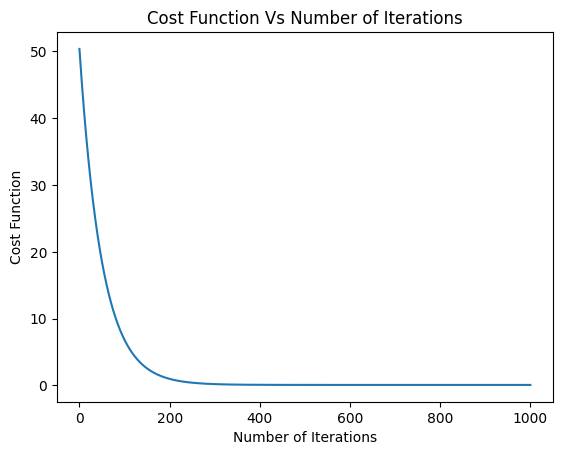

In [6]:
def lin_reg(X,y,num=10000,alpha=0.01):
    (m,n)= X.shape
    costf=[]
    w_initial=np.ones(n)
    b_initial=10
    def lin_cost(X,y,w,b):
        j=0.0
        f=np.dot(X,w)+b
        error=f-y
        j=(np.dot(error,error))/(2*m)
        return j 
    def gradient(X,y,w,b):
        dj_dw=np.zeros(n)
        dj_db=0
        f=np.dot(X,w)+b
        error=f-y
        dj_dw=np.dot(error.T,X)/m
        dj_db=sum(error)/m
        return dj_dw,dj_db
    def grad_desc(X,y,num,alpha,w,b):
        for i in range(num+1):
            J=lin_cost(X,y,w,b)
            costf.append(J)
            dj_dw,dj_db=gradient(X,y,w,b)
            w=w-(alpha*dj_dw)
            if i%100==0:
                print(f"Cost Function value after {i} iterations is = {J}")
            b=b-(alpha*dj_db)
        return w,b,costf
    w,b,costf=grad_desc(X,y,num,alpha,w_initial,b_initial)
    return w,b,costf

w,b,costf=lin_reg(X,Y,1000,0.01)
print(f"The value of w and b are {w} and {b} respectively...\n")  

mean=np.mean(Y,axis=0)
f=np.dot(X,w)+b
residual=(Y-f)
sqaure=(Y-mean)
r=np.dot(residual,residual)
s=np.dot(sqaure,sqaure)
print(f"The Value of R2 score for is {1-(r/s)}\n")

X=[]
for x in range(1001):
    X.append(x)
plt.plot(X,costf)
plt.title("Cost Function Vs Number of Iterations")
plt.xlabel('Number of Iterations') 
plt.ylabel('Cost Function')
plt.show()